In [55]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
path = '../data/graphs/kw34/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    return df
sns.set_theme(style="darkgrid")
checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

df = build_df_from_csvs(path)
df.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,0.000000,0.994230,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
1,20,0.000000,0.978541,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
2,30,0.013543,0.976104,3,0.792277,0.000000,100,3,0.3,modifiedrandomwalk,cw
3,40,0.015185,0.956944,2,0.931105,-0.061798,100,3,0.3,modifiedrandomwalk,cw
4,50,0.025176,0.951358,3,0.845357,-0.034217,100,3,0.3,modifiedrandomwalk,cw


In [64]:
df['Sampling'] = pd.Categorical(df['Sampling'], ['randomsampling', 'randomwalk', 'pagerank', 'modifiedrandomwalk', 'merandomwalk', 'dwug'])
df['Clustering'] = pd.Categorical(df['Clustering'], ['cc_split', 'cc_nosplit', 'ccc', 'cw', 'lm'])
df = df.sort_values(['Sampling', 'Clustering'])
df['Sampling-Clustering'] = df['Sampling'].astype(str) + '-' + df['Clustering'].astype(str)
df.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering,Sampling-Clustering
0,10,0.121789,0.998924,15,0.539092,0.038486,100,10,0.5,randomsampling,cc_split,randomsampling-cc_split
1,20,0.170985,0.997426,23,0.425156,0.022718,100,10,0.5,randomsampling,cc_split,randomsampling-cc_split
2,30,0.179463,0.993786,28,0.428859,0.024613,100,10,0.5,randomsampling,cc_split,randomsampling-cc_split
3,40,0.212875,0.988537,35,0.423909,0.028763,100,10,0.5,randomsampling,cc_split,randomsampling-cc_split
4,50,0.218363,0.971114,35,0.551797,0.059699,100,10,0.5,randomsampling,cc_split,randomsampling-cc_split


In [1]:
f = plt.figure(figsize=(24, 24))
gs = f.add_gridspec(2, 2)

f.add_subplot(gs[0, 0])
ax = sns.boxplot(data=df[df.Checkpoint == 100], x='ijsd', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='iJSD for 100 Judgements', xscale='log')


f.add_subplot(gs[0, 1])
ax = sns.boxplot(data=df[df.Checkpoint == 500], x='ijsd', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='iJSD for 500 Judgements')


f.add_subplot(gs[1, 0])
ax = sns.boxplot(data=df[df.Checkpoint == 1000], x='ijsd', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='iJSD for 1000 Judgements')


f.add_subplot(gs[1, 1])
ax = sns.boxplot(data=df[df.Checkpoint == 5000], x='ijsd', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='iJSD for 5000 Judgements')

f.tight_layout()

NameError: name 'plt' is not defined

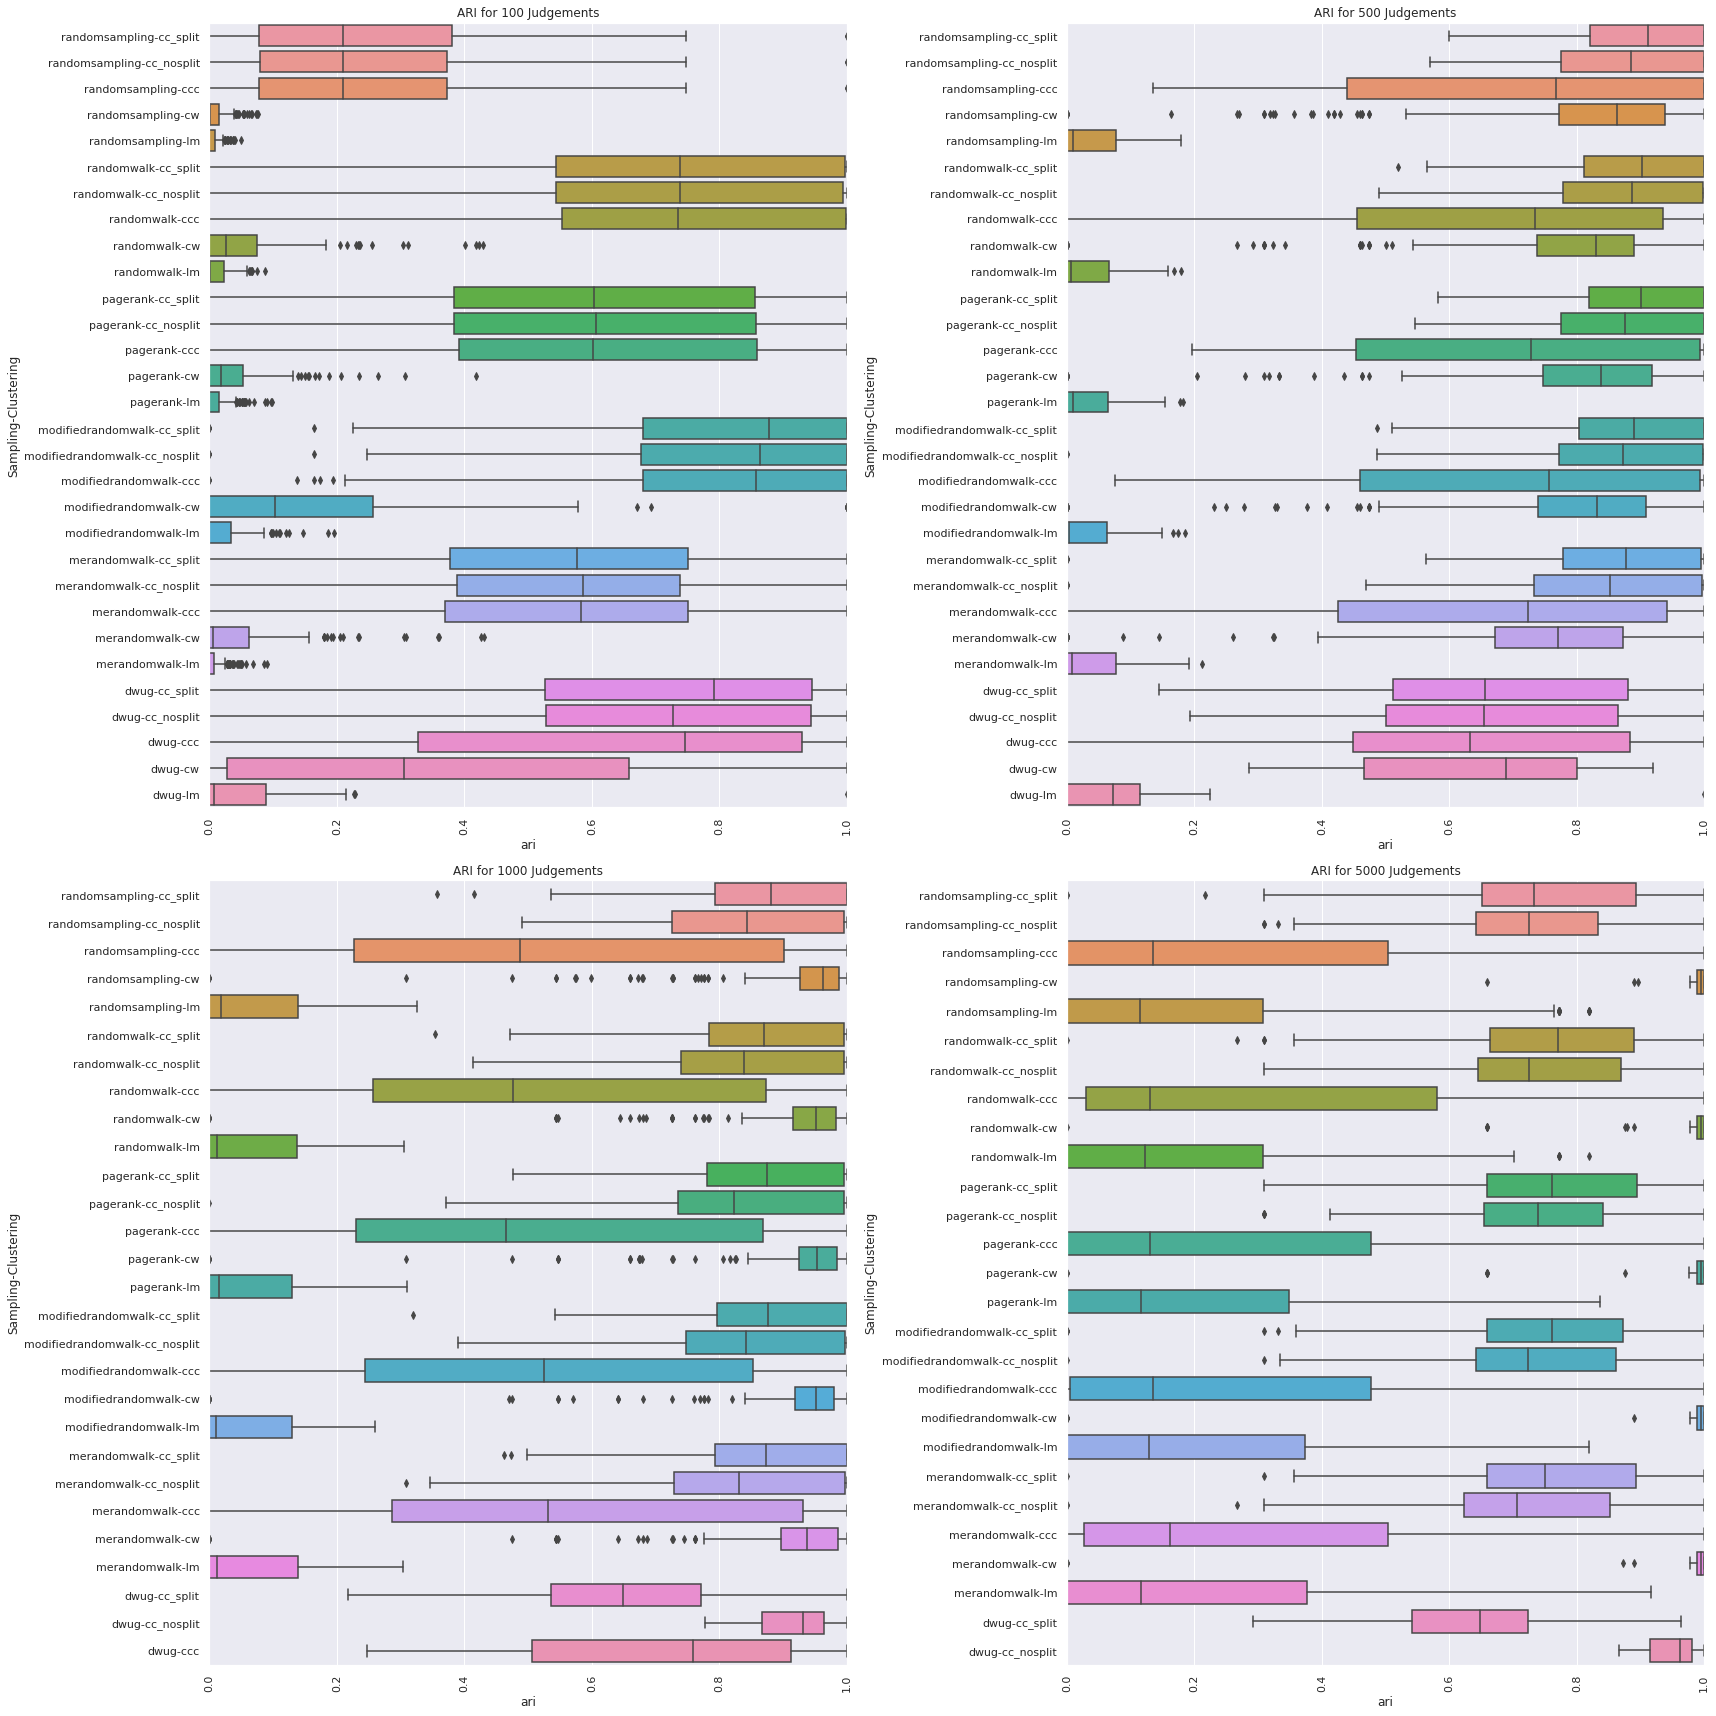

In [91]:
f = plt.figure(figsize=(24, 24))
gs = f.add_gridspec(2, 2)

f.add_subplot(gs[0, 0])
ax = sns.boxplot(data=df[df.Checkpoint == 100], x='ari', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='ARI for 100 Judgements')


f.add_subplot(gs[0, 1])
ax = sns.boxplot(data=df[df.Checkpoint == 500], x='ari', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='ARI for 500 Judgements')


f.add_subplot(gs[1, 0])
ax = sns.boxplot(data=df[df.Checkpoint == 1000], x='ari', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='ARI for 1000 Judgements')


f.add_subplot(gs[1, 1])
ax = sns.boxplot(data=df[df.Checkpoint == 5000], x='ari', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[0.0, 1.0], title='ARI for 5000 Judgements')

f.tight_layout()